# 神经网络基础

## 0. 深度学习的标记法

### 0.1 神经网络的标记法

**一般标记 General comments**：

- 上标 $(i)$ 表示第 $i$ 个训练样本；上标 $[l]$ 表示第 $l$ 层。

**大小 Sizes**:

- $m$: 数据集中的样本数量

- $n_x$: 输入大小（特征数）

- $n_y$: 输出大小（分类的数量）

- $n_h^{[l]}$: 第 $l$ 层的隐藏神经元数量

- $L$: 神经网络的总层数

这样，在for循环中，可以定义 $n_x = n_h^{[0]}, n_y = n_h^{[L+1]}$

**对象 Objects**

- $X \in \mathbb{R}^{n_x \times m}$ 是输入矩阵

- $x^{(i)} \in \mathbb{R}^{n_x}$ 是第 $i$ 个样本，表示为一个 $n_x$ 维的列向量

- $Y \in \mathbb{R}^{n_y \times m}$ 是标签矩阵

- $y^{(i)} \in \mathbb{R}^{n_y}$ 是第 $i$ 个样本对应的标签，表示为一个 $n_y$ 维的列向量

- $W^{[l]} \in \mathbb{R}^{下一层的神经元数量 \times 上一层的神经元数量}$ 是权重矩阵，上标 $[l]$ 表示所在层

- $b^{[l]} \in \mathbb{R}^{下一层的神经元数量}$ 是第 $l$ 层的截距向量

- $\hat{y} \in \mathbb{R}^{n_y}$ 是预测结果向量，也可以表示为 $a^{[L]}$

**常见的前向传播公式**

- $ a = g^{[l]}(W_xx^{(i)} + b_1) = g^{[l]}(z_1)$, $g^{[l]}$表示第l层的激活函数
- $ \hat{y}^{(i)} = softmax(W_hh + b_2) $
- 一般的激活公式: $a_j^{[l]} = g^{[l]}(\sum_k w_{jk}^{[l]}a_k^{[l-1]} + b_j^{[l]}) = g^{[l]}(z_j^{[l]}) $
- $J(x,W,b,y)$ 或 $J(\hat{y}, y)$ 表示成本函数

**成本函数的例子**

- $J_{CE}(\hat{y}, y) = -\sum_{i=0}^m y^{(i)}log\hat{y}^{(i)}$
- $J_1(\hat{y}, y) = \sum_{i=0}^m |y^{(i)} - \hat{y}^{(i)}|$


### 0.2 深度学习的标记法

对于使用图结构来表示的神经网络

- 节点表示输入、激活单元或输出
- 变表示权重或截距

![examples of Standard deep learning representations](img/examples of Standard deep learning representations.png)

### 0.3 特别注意！

为了计算的便利，神经网络和传统机器学习在表示层面上，有这样两个显著的不同：

- 相对于传统机器学习，神经网络的输入矩阵 $X$ 是转置过的 $n \times m$ 矩阵，其中每一列是一个样本，每一行是一个特征。传统机器学习习惯上 $X$ 是一个 $m \times n$ 矩阵，其中每一行是一个样本，每一列是一个特征。相应的，标签矩阵 $y$ 也经过了转置。

- 在传统机器学习中，每个样本作为输入向量通常会加入一个 $x_0=1$ 的变量，使得输入矩阵成为 $m \times (n+1)$ 的矩阵，从而输入向量和权重相乘的计算可以写作 $\hat{y} = \theta^Tx$。神经网络中通常将截距项和权重项分开，等同于 $b=\theta_0$ 而 $w = [\theta_1;\theta_2;...;\theta_n]$。

## 1. 二分类

在二分类问题中，输出结果是离散型的二值。

例子：判定图片里是否包含猫

这里的目标是训练一个分类器，将图像作为输入并表示为特征向量 $x$，预测对应的标签 $y$ 是1还是0。在这里0、1的含义是这张图片包含猫（1）或不包含猫（0）。

![image to feature vector](img/image to feature vector.png)

在计算机中图像通常被存储成三个独立的矩阵，分别对应着图像的红、绿、蓝三个通道。三个矩阵和图片的像素大小相同，比如上面这张图片为64像素X64像素，相应地，三个矩阵（RGB）也都是 $64 \times 64$。

矩阵中的值表示着像素中对应通道颜色的强度，三个矩阵中的所有值一起构成了 $n$ 维的特征向量。在模式识别和机器学习中，特征向量表示一个对象，在这个例子中，表示图片包含猫或不包含猫。

要创建这个特征向量 $x$，所有的像素颜色强度将被重新整合。特征向量 $x$ 的维度为 $n_x = 64 \times 64 \times 3 = 12288$。

![feature vector](img/feature vector.png)

## 2. 逻辑回归

逻辑回归是一种解决监督学习中二分类问题的学习算法。逻辑学习的目标是最小化预测值和训练数据标签值之间的误差。

依然是训练识别猫的图片的分类器为例，给定一个特征向量 $x$，逻辑回归算法将能够给出图片中包含猫的概率

$$\hat{y} = P(y=1|x), 其中0 \leq \hat{y} \leq 1$$

逻辑回归中包含以下参数：

- 输入特征向量：$x \in \mathbb{R}^{n_x}$，其中 $n_x$ 是特征数
- 训练标签：$y \in \{0, 1\}$
- 权重：$w \in \mathbb{R}^{n_x}$，其中 $n_x$ 是特征数
- 阈值：$b \in \mathbb{R}$
- 输出：$\hat{y} = \sigma(w^Tx+b)$
- Sigmoid函数：$s = \sigma(w^Tx+b) = \sigma(z) = \frac{1}{1+e^{-z}}$

![sigmoid function](img/sigmoid function.png)

$(w^Tx+b)$ 是一个线性函数，由于这里我们需要一个概率表示，输出值需要在 $[0,1]$ 区间内，因此使用了Sigmoid函数。Sigmoid函数的值域为 $[0,1]$，如上图所示。

观察Sigmoid函数的图像，可以看到如下一些性质：

- 如果 $z$ 是一个非常大的正数，那么 $\sigma(z)=1$
- 如果 $z$ 非常小，或者说是一个非常大的负数，那么 $\sigma(z)=0$
- 如果 $z=0$，那么 $\sigma(z) = 0.5$

## 3. 逻辑回归的成本函数

训练模型获得参数 $w$ 和 $b$，需要首先定义**成本函数 cost function**

**损失函数 Loss function**:

损失函数衡量着预测值($\hat{y}^{(i)}$)和期望输出值($y^{(i)}$)之间的差异。换言之，损失函数计算单个训练样本的误差值。

$$ L(\hat{y}^{(i)}, y^{(i)}) = \frac{1}{2}(\hat{y}^{(i)} - y^{(i)})^2 $$
$$ L(\hat{y}^{(i)}, y^{(i)}) = -(y^{(i)}log(\hat{y}^{(i)}) + (1-y^{(i)})log(1-\hat{y}^{(i)}))$$

其中，第一个平方误差的损失函数，会造成非凸的优化目标，逻辑回归通常使用第二个Logloss作为损失函数。

**成本函数 Cost function**:

成本函数是整个训练集中每个训练样本的损失函数值的均值。最终找到的参数 $w$ 和 $b$ 应该使全局的成本函数取得最小值。

$$ J(w, b) = \frac{1}{m}\sum_{i=1}^m L(\hat{y}^{(i)}, y^{(i)}) = -\frac{1}{m}\sum_{i=1}^m[y^{(i)}log(\hat{y}^{(i)}) + (1-y^{(i)})log(1-\hat{y}^{(i)})] $$

## 4. 导数、偏导、链式求导法则

复习一元函数导数、多元函数偏导、链式求导法则，不赘述。

## 5. 梯度下降

求成本函数的偏导，根据偏导和学习速率进行梯度更新。较为基础，不赘述。

## 6. 向量化

在用numpy写深度学习算法时，应当尽可能地避免使用for循环。numpy自带了很多方便的向量化操作，使用这些操作会比显式的for循环快得多。numpy底层的C或Fortran代码，会利用CPU的SIMD并行指令，在CPU层面实现单指令多数据流，从而更好地利用CPU的并行能力。同样的技巧也适用于GPU，事实上GPU对于处理这样SIMD指令的能力比CPU还强。

## 7. Show Me The Code

在这里，我们将构建一个逻辑回归分类器，用来识别包含猫的图片。

**要求：**
- 除非明确指出，在代码中不使用循环

**通过这个编程练习，可以学到：**
- 构建学习算法的基本架构，包括:
    - 初始化参数
    - 计算成本函数及其梯度
    - 使用优化算法（梯度下降）
- 将上述三个函数组合为模型函数

### 7.1 三方包

首先，运行下面的代码块，来引入在这个编程练习中所需要的包。 
- [numpy](www.numpy.org) 是Python生态圈中进行科学计算的基础包。
- [h5py](http://www.h5py.org) 是和存储为H5文件的数据集进行交互的通用包。
- [matplotlib](http://matplotlib.org) 是Python生态圈中著名的绘图包。
- [PIL](http://www.pythonware.com/products/pil/) 和 [scipy](https://www.scipy.org/) 用来使用图片对模型进行测试。

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage
from lr_utils import load_dataset

%matplotlib inline

### 7.2 问题总览

**问题表述**: 给定一个数据集（"data.h5"），包括：
    - 包含 m_train 张图片的训练集，标记为猫（y=1）或非猫（y=0）
    - 包含 m_test 张图片的测试集，标记为猫或非猫
    - 每张图片表示为 （num_px, num_px, 3）的矩阵，其中3表示RGB三通道。因而，每张图片都是正方形的（长=num_px，宽=num_px）

我们会构建一个简单的图像识别算法，这个算法希望能够准确地分类猫和非猫。

用下面的代码可以导入数据集。

In [2]:
# Loading the data (cat/non-cat)
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()

这里我们对图像数据（包括训练和测试）加了后缀_orig，因为接下来我们会对这些数据进行预处理。预处理后会得到train_set_x和test_set_x。（train_set_y和test_set_y）不需要预处理。

train_set_x_orig和test_set_x_orig中的每一行代表了一张图片的数组表示。我们可以通过下面的代码进行可视化，改变`index`的值并重新执行，还可以看到其它的图片。

y = [1], it's a 'cat' picture.


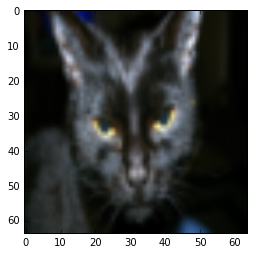

In [3]:
# Example of a picture
index = 25
plt.imshow(train_set_x_orig[index])
print ("y = " + str(train_set_y[:, index]) + ", it's a '" + classes[np.squeeze(train_set_y[:, index])].decode("utf-8") +  "' picture.")

许多深度学习软件的bug都来自于矩阵或向量的维度不匹配。如果我们始终对矩阵或向量的维度有准确把握，开发的过程中可以消除很多bug。

**练习** 获得以下值:
    - m_train (训练集样本数)
    - m_test (测试集样本数)
    - num_px (训练图片的长和宽)
注意，`train_set_x_orig`是一个numpy数组，它的形状是 (m_train, num_px, num_px, 3)。比如，可以通过`train_set_x_orig.shape[0]`来获取`m_train`。

In [4]:
### START CODE HERE ### (≈ 3 lines of code)
m_train = train_set_x_orig.shape[0]
m_test = test_set_x_orig.shape[0]
num_px = train_set_x_orig.shape[1]
### END CODE HERE ###

print ("Number of training examples: m_train = " + str(m_train))
print ("Number of testing examples: m_test = " + str(m_test))
print ("Height/Width of each image: num_px = " + str(num_px))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_set_x shape: " + str(train_set_x_orig.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x shape: " + str(test_set_x_orig.shape))
print ("test_set_y shape: " + str(test_set_y.shape))

Number of training examples: m_train = 209
Number of testing examples: m_test = 50
Height/Width of each image: num_px = 64
Each image is of size: (64, 64, 3)
train_set_x shape: (209, 64, 64, 3)
train_set_y shape: (1, 209)
test_set_x shape: (50, 64, 64, 3)
test_set_y shape: (1, 50)


**上面这段代码关于m_train, m_test 和 num_px的预期执行结果为**: 
<table style="width:15%">
  <tr>
    <td>**m_train**</td>
    <td> 209 </td> 
  </tr>
  
  <tr>
    <td>**m_test**</td>
    <td> 50 </td> 
  </tr>
  
  <tr>
    <td>**num_px**</td>
    <td> 64 </td> 
  </tr>
  
</table>

为了运算方便，这里需要将 (num_px, num_px, 3) 形状的图片转换为 (num_px * num_px * 3) 的numpy数组。转换过后，训练集（测试集）的每一列代表平展之后的图片，总共有 m_train（m_test） 列。

In [5]:
# Reshape the training and test examples

### START CODE HERE ### (≈ 2 lines of code)
train_set_x_flatten = train_set_x_orig.reshape((m_train, num_px * num_px * 3)).T
test_set_x_flatten = test_set_x_orig.reshape((m_test, num_px * num_px * 3)).T
### END CODE HERE ###

print ("train_set_x_flatten shape: " + str(train_set_x_flatten.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x_flatten shape: " + str(test_set_x_flatten.shape))
print ("test_set_y shape: " + str(test_set_y.shape))
print ("sanity check after reshaping: " + str(train_set_x_flatten[0:5,0]))

train_set_x_flatten shape: (12288, 209)
train_set_y shape: (1, 209)
test_set_x_flatten shape: (12288, 50)
test_set_y shape: (1, 50)
sanity check after reshaping: [17 31 56 22 33]


**预期执行结果**: 

<table style="width:35%">
  <tr>
    <td>**train_set_x_flatten shape**</td>
    <td> (12288, 209)</td> 
  </tr>
  <tr>
    <td>**train_set_y shape**</td>
    <td>(1, 209)</td> 
  </tr>
  <tr>
    <td>**test_set_x_flatten shape**</td>
    <td>(12288, 50)</td> 
  </tr>
  <tr>
    <td>**test_set_y shape**</td>
    <td>(1, 50)</td> 
  </tr>
  <tr>
  <td>**sanity check after reshaping**</td>
  <td>[17 31 56 22 33]</td> 
  </tr>
</table>

每个像素的RGB三通道值一起构成了整副图片，因此每个像素实际上是一个由三个数字组成的向量，每个数字的取值范围为0到255。

机器学习中一个常见的预处理方法是对数据进行标准化，意思是对numpy数组中的每个特征，减去其均值，再除以标准差。对于图片类型的数据，直接对所有值除以255（像素通道的最大值）会更方便，也同样有效。

在模型训练的过程中，首先权重和截距会和初始输入值进行运算来激活神经元，接下来使用梯度下降的反向传播来训练模型。所有特征有大致相当的值域这点十分重要，这样梯度才不会爆炸。后面的课程中会看到更多这样的例子。

接下来对数据进行标准化。

In [6]:
train_set_x = train_set_x_flatten/255.
test_set_x = test_set_x_flatten/255.

<font color='blue'>
**请牢记：**

图片数据预处理的常见步骤：
- 弄清问题所需要的数据维度和矩阵形状（m_train, m_test, num_px, ...)
- 转换数据集的形状使得每个训练样本是一个 (num_px \* num_px \* 3, 1) 的向量
- 对数据进行标准化

### 7.3 学习算法的架构总览

这里我们将用神经网络的思维，来构造逻辑回归算法，对猫的图片进行分类。下面这幅图解释了，为什么说逻辑回归实际上是一个非常简单的神经网络。

<img src="img/LogReg_kiank.png" style="width:650px;height:400px;">

**算法的数学表达**:

对于样本 $x^{(i)}$:
$$z^{(i)} = w^T x^{(i)} + b \tag{1}$$
$$\hat{y}^{(i)} = a^{(i)} = sigmoid(z^{(i)})\tag{2}$$ 
$$ \mathcal{L}(a^{(i)}, y^{(i)}) =  - y^{(i)}  \log(a^{(i)}) - (1-y^{(i)} )  \log(1-a^{(i)})\tag{3}$$

算法的成本是对所有训练样本的损失求和后取平均:
$$ J = \frac{1}{m} \sum_{i=1}^m \mathcal{L}(a^{(i)}, y^{(i)})\tag{6}$$

**关键步骤**:
在本练习中，需要完成以下步骤：
    - 初始化模型参数
    - 通过最小化成本，学得模型的参数
    - 使用学得的参数进行预测（针对测试集数据）
    - 分析结果并总结

### 7.4 构建学习算法

构建神经网络的主要步骤包括：
1. 定义模型结构（比如输入特征的数量）
2. 初始化模型参数
3. 循环:
    - 计算当前损失（前向传播）
    - 计算当前梯度（后向传播）
    - 更新参数（梯度下降）

通常1-3的步骤是单独构建的，最终再把这些组件组合成一个叫做`model()`的函数。

#### 7.4.1 - 辅助函数

**练习**: 实现`sigmoid()`函数。根据上面的图片可知，需要计算 $sigmoid( w^T x + b) = \frac{1}{1 + e^{-(w^T x + b)}}$ 来进行预测. 注意使用 np.exp().

In [7]:
# GRADED FUNCTION: sigmoid

def sigmoid(z):
    """
    Compute the sigmoid of z

    Arguments:
    z -- A scalar or numpy array of any size.

    Return:
    s -- sigmoid(z)
    """

    ### START CODE HERE ### (≈ 1 line of code)
    s = 1 / (1 + np.exp(-z))
    ### END CODE HERE ###
    
    return s

In [8]:
print ("sigmoid([0, 2]) = " + str(sigmoid(np.array([0,2]))))

sigmoid([0, 2]) = [ 0.5         0.88079708]


**预期输出**: 

<table>
  <tr>
    <td>**sigmoid([0, 2])**</td>
    <td> [ 0.5         0.88079708]</td> 
  </tr>
</table>

### 7.4.2 - 参数初始化

**练习:** 在下面的代码块中，实现参数初始化。需要将w初始化为一列为0的向量。可以使用np.zeros()函数。

In [9]:
# GRADED FUNCTION: initialize_with_zeros

def initialize_with_zeros(dim):
    """
    This function creates a vector of zeros of shape (dim, 1) for w and initializes b to 0.
    
    Argument:
    dim -- size of the w vector we want (or number of parameters in this case)
    
    Returns:
    w -- initialized vector of shape (dim, 1)
    b -- initialized scalar (corresponds to the bias)
    """
    
    ### START CODE HERE ### (≈ 1 line of code)
    w = np.zeros((dim, 1))
    b = 0
    ### END CODE HERE ###

    assert(w.shape == (dim, 1))
    assert(isinstance(b, float) or isinstance(b, int))
    
    return w, b

In [10]:
dim = 2
w, b = initialize_with_zeros(dim)
print ("w = " + str(w))
print ("b = " + str(b))

w = [[ 0.]
 [ 0.]]
b = 0


**预期输出**: 


<table style="width:15%">
    <tr>
        <td>  ** w **  </td>
        <td> [[ 0.]
 [ 0.]] </td>
    </tr>
    <tr>
        <td>  ** b **  </td>
        <td> 0 </td>
    </tr>
</table>

对于图片输入来说，w将会是(num_px $\times$ num_px $\times$ 3, 1)形状的向量。

#### 7.4.3 - 前向传播和反向传播

参数初始化之后，就可以进行前向传播和反向传播过程，来学习参数。

**练习:** 实现计算成本及其梯度的函数 `propagate()` 。

**提示**:

前向传播:
- 已有 X
- 计算 $A = \sigma(w^T X + b) = (a^{(0)}, a^{(1)}, ..., a^{(m-1)}, a^{(m)})$
- 计算成本函数: $J = -\frac{1}{m}\sum_{i=1}^{m}y^{(i)}\log(a^{(i)})+(1-y^{(i)})\log(1-a^{(i)})$

下面是计算梯度的两个公式: 

$$ \frac{\partial J}{\partial w} = \frac{1}{m}X(A-Y)^T\tag{7}$$
$$ \frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^m (a^{(i)}-y^{(i)})\tag{8}$$

In [11]:
# GRADED FUNCTION: propagate

def propagate(w, b, X, Y):
    """
    Implement the cost function and its gradient for the propagation explained above

    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat) of size (1, number of examples)

    Return:
    cost -- negative log-likelihood cost for logistic regression
    dw -- gradient of the loss with respect to w, thus same shape as w
    db -- gradient of the loss with respect to b, thus same shape as b
    
    Tips:
    - Write your code step by step for the propagation. np.log(), np.dot()
    """
    
    m = X.shape[1]
    
    # FORWARD PROPAGATION (FROM X TO COST)
    ### START CODE HERE ### (≈ 2 lines of code)
    A = sigmoid(np.dot(w.T, X) + b)                                    # compute activation
    cost = -np.mean(Y * np.log(A) + (1 - Y) * np.log(1 - A))                                 # compute cost
    ### END CODE HERE ###
    
    # BACKWARD PROPAGATION (TO FIND GRAD)
    ### START CODE HERE ### (≈ 2 lines of code)
    dw = np.dot(X, (A - Y).T) / m
    db = np.mean(A - Y)
    ### END CODE HERE ###

    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape == ())
    
    grads = {"dw": dw,
             "db": db}
    
    return grads, cost

In [12]:
w, b, X, Y = np.array([[1.],[2.]]), 2., np.array([[1.,2.,-1.],[3.,4.,-3.2]]), np.array([[1,0,1]])
grads, cost = propagate(w, b, X, Y)
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))
print ("cost = " + str(cost))

dw = [[ 0.99845601]
 [ 2.39507239]]
db = 0.00145557813678
cost = 5.80154531939


**预期输出**:

<table style="width:50%">
    <tr>
        <td>  ** dw **  </td>
      <td> [[ 0.99845601]
     [ 2.39507239]]</td>
    </tr>
    <tr>
        <td>  ** db **  </td>
        <td> 0.00145557813678 </td>
    </tr>
    <tr>
        <td>  ** cost **  </td>
        <td> 5.801545319394553 </td>
    </tr>

</table>

#### d) 优化
- 目前已经对参数进行了初始化
- 也已经可以计算成本函数及其梯度
- 现在，我们希望根据梯度下降进行参数更新

**练习:** 完成优化函数。这里的目标是通过最小化成本函数 $J$，学得对应的参数 $w$ 和 $b$。对参数 $\theta$ 来说，梯度下降的更新规则是 $ \theta = \theta - \alpha \text{ } d\theta$, 其中 $\alpha$ 是学习速率。

In [13]:
# GRADED FUNCTION: optimize

def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
    """
    This function optimizes w and b by running a gradient descent algorithm
    
    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of shape (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat), of shape (1, number of examples)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- True to print the loss every 100 steps
    
    Returns:
    params -- dictionary containing the weights w and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.
    
    Tips:
    You basically need to write down two steps and iterate through them:
        1) Calculate the cost and the gradient for the current parameters. Use propagate().
        2) Update the parameters using gradient descent rule for w and b.
    """
    
    costs = []
    
    for i in range(num_iterations):
        
        
        # Cost and gradient calculation (≈ 1-4 lines of code)
        ### START CODE HERE ### 
        grads, cost = propagate(w, b, X, Y)
        ### END CODE HERE ###
        
        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]
        
        # update rule (≈ 2 lines of code)
        ### START CODE HERE ###
        w = w - learning_rate * dw
        b = b - learning_rate * db
        ### END CODE HERE ###
        
        # Record the costs
        if i % 100 == 0:
            costs.append(cost)
        
        # Print the cost every 100 training examples
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs

In [14]:
params, grads, costs = optimize(w, b, X, Y, num_iterations= 100, learning_rate = 0.009, print_cost = False)

print ("w = " + str(params["w"]))
print ("b = " + str(params["b"]))
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))

w = [[ 0.19033591]
 [ 0.12259159]]
b = 1.92535983008
dw = [[ 0.67752042]
 [ 1.41625495]]
db = 0.219194504541


**预期执行结果**: 

<table style="width:40%">
    <tr>
       <td> **w** </td>
       <td>[[ 0.19033591]
 [ 0.12259159]] </td>
    </tr>
    
    <tr>
       <td> **b** </td>
       <td> 1.92535983008 </td>
    </tr>
    <tr>
       <td> **dw** </td>
       <td> [[ 0.67752042]
 [ 1.41625495]] </td>
    </tr>
    <tr>
       <td> **db** </td>
       <td> 0.219194504541 </td>
    </tr>

</table>

**练习:** 上面的函数会输出最终学得的参数 w 和 b。我们可以使用 w 和 b 来预测数据集 X 的标签。实现 `predict()` 函数，包含两个步骤:

1. 计算 $\hat{Y} = A = \sigma(w^T X + b)$

2. 讲结果转为0 (如果 激活值 <= 0.5) 或 1 (如果 激活值 > 0.5), 讲预测结果存储在向量 `Y_prediction` 中。

In [15]:
# GRADED FUNCTION: predict

def predict(w, b, X):
    '''
    Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)
    
    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px * 3, number of examples)
    
    Returns:
    Y_prediction -- a numpy array (vector) containing all predictions (0/1) for the examples in X
    '''
    
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0], 1)
    
    # Compute vector "A" predicting the probabilities of a cat being present in the picture
    ### START CODE HERE ### (≈ 1 line of code)
    A = sigmoid(np.dot(w.T, X) + b)
    ### END CODE HERE ###
    
    for i in range(A.shape[1]):
        
        # Convert probabilities A[0,i] to actual predictions p[0,i]
        ### START CODE HERE ### (≈ 4 lines of code)
        Y_prediction[0][i] = 1 if A[0][i] > 0.5 else 0
        ### END CODE HERE ###
    
    assert(Y_prediction.shape == (1, m))
    
    return Y_prediction

In [16]:
w = np.array([[0.1124579],[0.23106775]])
b = -0.3
X = np.array([[1.,-1.1,-3.2],[1.2,2.,0.1]])
print ("predictions = " + str(predict(w, b, X)))

predictions = [[ 1.  1.  0.]]


**预期输出**: 

<table style="width:30%">
    <tr>
         <td>
             **predictions**
         </td>
          <td>
            [[ 1.  1.  0.]]
         </td>  
   </tr>

</table>


<font color='blue'>
**回顾:**
我们实现了几个函数，用来:
- 初始化 (w,b)
- 迭代地优化损失，从而学得参数 (w,b):
    - 计算成本及其梯度 
    - 使用梯度下降更新参数
- 使用学得的参数 (w,b) 对预测给定数据集的标签

### 7.5 将所有函数合并为模型

将所有函数按正确的顺序组合在一起，形成模型。

**练习:** 实现model函数，采用以下标记:
    - Y_prediction 表示对测试集的预测值
    - Y_prediction_train 表示对训练集的预测值
    - w, costs, grads 表示需要优化的输出值

In [17]:
# GRADED FUNCTION: model

def model(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.5, print_cost = False):
    """
    Builds the logistic regression model by calling the function you've implemented previously
    
    Arguments:
    X_train -- training set represented by a numpy array of shape (num_px * num_px * 3, m_train)
    Y_train -- training labels represented by a numpy array (vector) of shape (1, m_train)
    X_test -- test set represented by a numpy array of shape (num_px * num_px * 3, m_test)
    Y_test -- test labels represented by a numpy array (vector) of shape (1, m_test)
    num_iterations -- hyperparameter representing the number of iterations to optimize the parameters
    learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
    print_cost -- Set to true to print the cost every 100 iterations
    
    Returns:
    d -- dictionary containing information about the model.
    """
    
    ### START CODE HERE ###
    
    # initialize parameters with zeros (≈ 1 line of code)
    w, b = initialize_with_zeros(X_train.shape[0])

    # Gradient descent (≈ 1 line of code)
    parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)
    
    # Retrieve parameters w and b from dictionary "parameters"
    w = parameters["w"]
    b = parameters["b"]
    
    # Predict test/train set examples (≈ 2 lines of code)
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)

    ### END CODE HERE ###

    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

运行下面的代码块来训练模型

In [18]:
d = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 2000, learning_rate = 0.005, print_cost = True)

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.584508
Cost after iteration 200: 0.466949
Cost after iteration 300: 0.376007
Cost after iteration 400: 0.331463
Cost after iteration 500: 0.303273
Cost after iteration 600: 0.279880
Cost after iteration 700: 0.260042
Cost after iteration 800: 0.242941
Cost after iteration 900: 0.228004
Cost after iteration 1000: 0.214820
Cost after iteration 1100: 0.203078
Cost after iteration 1200: 0.192544
Cost after iteration 1300: 0.183033
Cost after iteration 1400: 0.174399
Cost after iteration 1500: 0.166521
Cost after iteration 1600: 0.159305
Cost after iteration 1700: 0.152667
Cost after iteration 1800: 0.146542
Cost after iteration 1900: 0.140872
train accuracy: 99.04306220095694 %
test accuracy: 70.0 %


**预期执行结果**: 

<table style="width:40%"> 

    <tr>
        <td> **Cost after iteration 0 **  </td> 
        <td> 0.693147 </td>
    </tr>
      <tr>
        <td> <center> $\vdots$ </center> </td> 
        <td> <center> $\vdots$ </center> </td> 
    </tr>  
    <tr>
        <td> **Train Accuracy**  </td> 
        <td> 99.04306220095694 % </td>
    </tr>

    <tr>
        <td>**Test Accuracy** </td> 
        <td> 70.0 % </td>
    </tr>
</table> 




**注释**: 训练集准确率接近100%，这是一个很好的检查：我们的模型运转正常，有足够的能力来你和训练数据。测试的准确率为70%，对于这样一个简单的模型来说，考虑到我们的数据集很小而逻辑回归又是线性分类器，这个成绩也不算太坏。但不用担心，后面我们会构建更好的分类器。

另外，显然我们的模型已经对训练数据过拟合了。在后面的课程中，我们将会学习到如何控制过拟合，比如使用正则化。使用下面的代码块（可以修改`index`），对测试集数据的预测进行可视化。

y = 0, you predicted that it is a "cat" picture.


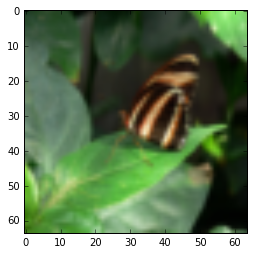

In [19]:
# Example of a picture that was wrongly classified.
index = 5
plt.imshow(test_set_x[:,index].reshape((num_px, num_px, 3)))
print("y = " + str(test_set_y[0,index]) + ", you predicted that it is a \"" + classes[int(d["Y_prediction_test"][0,index])].decode("utf-8") +  "\" picture.")

同样地，我们也对成本函数和梯度进行可视化

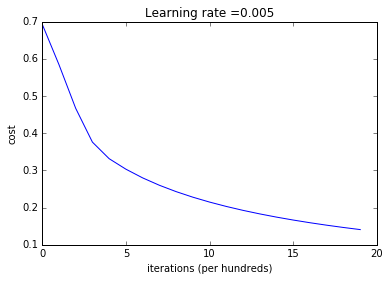

In [20]:
# Plot learning curve (with costs)
costs = np.squeeze(d['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(d["learning_rate"]))
plt.show()

**解释**:
可以看到成本一直在下降，这表明参数一直在按照我们的预想进行学习。而从趋势上，训练集的成本还可以进一步降低。试着增加上面代码块中的迭代次数并重新执行。你可能会发现，训练集的准确率进一步上升了，而测试集的准确率进一步下降。这种现象叫做过拟合。

### 7.6 进一步的分析

#### 学习速率的选择

**提示**:
为了保证梯度下降顺利执行，首先需要合理地选择学习速率。学习速率 $\alpha$ 决定了更新参数的幅度。当学习速率过大时，可能会适得其反。而当学习速率很小时，则会耗费更多轮次的迭代来收敛到最终数值。因此选择合适的学习速率十分关键。

我们来比较一下不同的学习速率所对应的学习曲线。执行下面的代码块，你也可以修改不同的学习速率值`learning_rates`，来看对应的情况。 

learning rate is: 0.01
train accuracy: 99.52153110047847 %
test accuracy: 68.0 %

-------------------------------------------------------

learning rate is: 0.001
train accuracy: 88.99521531100478 %
test accuracy: 64.0 %

-------------------------------------------------------

learning rate is: 0.0001
train accuracy: 68.42105263157895 %
test accuracy: 36.0 %

-------------------------------------------------------



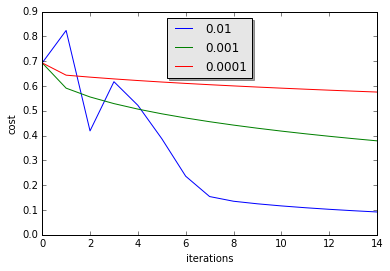

In [21]:
learning_rates = [0.01, 0.001, 0.0001]
models = {}
for i in learning_rates:
    print ("learning rate is: " + str(i))
    models[str(i)] = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 1500, learning_rate = i, print_cost = False)
    print ('\n' + "-------------------------------------------------------" + '\n')

for i in learning_rates:
    plt.plot(np.squeeze(models[str(i)]["costs"]), label= str(models[str(i)]["learning_rate"]))

plt.ylabel('cost')
plt.xlabel('iterations')

legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()

**解释**: 
- 不同的学习速率给出了不同的成本，从而也对应了不同的预测结果
- 如果学习速率过大（0.01），成本可能上下震荡，甚至可能发散。（在这个例子中，使用0.01的学习速率依然最终收敛到了一个还不错的成本值）
- 更低的成本不一定对应着更好的模型，也可能的过拟合。当发生过拟合时，训练集的准确率会远高于测试机的准确率。
- 在深度学习中，通常间隙: 
    - 使用更好最小化成本函数的学习速率。
    - 如果模型过拟合，则使用其它的一些技巧来降低过拟合。
